In [2]:
# ###################################
# Group ID: 222
# Members: Adrián Gómez Repollés, Kresten Johansen, Misbah Unnisa, Mohammadali Zakeriharandi
# Date: 22/03/2024
# Lecture: Lecture 11 Decision Trees
# Dependencies: Numpy, Scipy, Scikit-Learn, Pytorch and Matplotlib.
# Python version: 3.12.2
# Functionality: Jupyter notebook to examine the California housing data using decision trees.
# ###################################

## Day 5 - Exercise

**In this exercise, we examine the use of decision trees for both classification and regression. First import the California housing data set and split the data into a training set and a test set.**

### For classification:

**Artificially create two classes based on the price. Use mean price as the threshold: class 1 if the price is larger than mean; otherwise, class 0. Split the data into training (80%) and test (20%). Afterwards, train a decision tree classifier on the training data and see how it performs on both the training data and the test data. Try to experiment with the depth of the tree and see what effect this has on the classification accuracy. Note all 13 dimensional features, as originally provided by the dataset, are used as input, and the labels/targets are 0 (low price) and 1 (high price).**



In [145]:
## Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingRegressor


In [99]:
## Helper functions

# Load data
def load_data(mode):
    # Dataset
    X = fetch_california_housing(as_frame=True)['frame']
    if mode == "Classification":
        # Artificial class
        mean_price = X['MedHouseVal'].mean()
        y = [1 if i > mean_price else 0 for i in X['MedHouseVal']]
        # Remove original variable that produce the category
        X = X.drop(['MedHouseVal'], axis=1)
        # Split train-test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)
    elif mode == "Regression":
        y = X['MedHouseVal']
        X = X.drop(['MedHouseVal'], axis=1)
        # Split train-test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    # Return
    return(X_train, y_train, X_test, y_test)

# Plot train test error of grid search
def plot_train_test_error(gs):
    # Values
    iters = np.arange(1,len(gs.cv_results_['params'])+1,1)
    train_scores = gs.cv_results_['mean_train_score']
    test_scores = gs.cv_results_['mean_test_score']
    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(iters, train_scores, c="orange", label="Train")
    plt.plot(iters, test_scores, c="blue", label="Test")
    plt.xlabel("Iterations")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

# Plot confusion matrices
def plot_confusion_matrix(orig_train, pred_train, orig_test, pred_test, labels, normalize = None):
    # Measure accuracies
    acc_train = accuracy_score(orig_train, pred_train)
    acc_test = accuracy_score(orig_test, pred_test)
    # Create confusion matrices
    cm_train = np.round(confusion_matrix(orig_train, pred_train, labels=labels, normalize=normalize),2)
    vcm_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
    cm_test = np.round(confusion_matrix(orig_test, pred_test, labels=labels, normalize=normalize),2)
    vcm_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
    # Plot confusion matrix
    fig, ax = plt.subplots(1,2, figsize=(8,8))
    plt.rcParams.update({'font.size': 12})
    # Confusion matrices
    vcm_train.plot(ax=ax[0], cmap="Blues", colorbar=None) # Train
    vcm_test.plot(ax=ax[1], cmap="Greens", colorbar=None) # Test
    ax[0].set_title(f"Train (Acc: {np.round(acc_train,2)})") # Train
    ax[1].set_title(f"Test (Acc: {np.round(acc_test,2)})") # Test
    plt.show()

In [91]:
# Data
X_train, y_train, X_test, y_test = load_data(mode="Classification")

In [69]:
## Grid Search: Random forest

# Model
rfcls = RandomForestClassifier()

# Parameters
params = {
    'n_estimators': [20,50,100,500],
    'max_depth': [10, 30, None],
    'max_samples': [35, None],
    'ccp_alpha': [0.0, 0.5],
}

# Search
rfcls_gs = GridSearchCV(rfcls, params, n_jobs=4, cv=5, verbose=3, scoring='f1', return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[CV 3/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=0.707, test=0.713) total time=   0.1s
[CV 1/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=0.686, test=0.685) total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=0.728, test=0.708) total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=0.691, test=0.676) total time=   0.1s
[CV 5/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=0.731, test=0.708) total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=50;, score=(train=0.749, test=0.740) total time=   0.2s
[CV 1/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=50;, score=(train=0.763, test=0.753) total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=50;, score=(train=0.725, test=0.729) tot

In [48]:
# Result
display(rfcls_gs.best_params_)
rfcls_gs.best_score_


{'ccp_alpha': 0.0, 'max_depth': 30, 'max_samples': None, 'n_estimators': 500}

0.8615660171946644

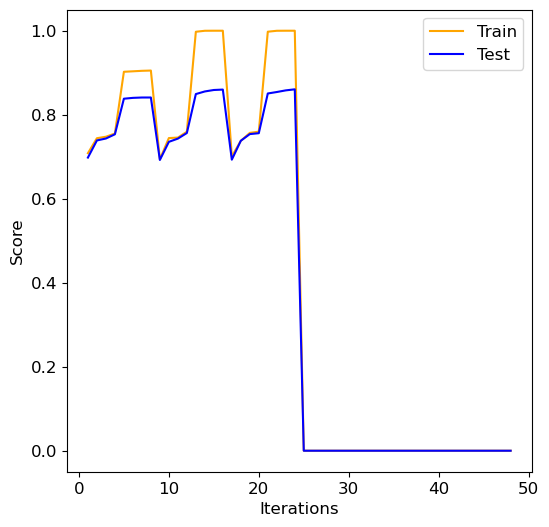

In [100]:
# Train/Test scores
plot_train_test_error(rfcls_gs)

In [76]:
# Prediction
pred_train = rfcls_gs.best_estimator_.predict(X_train)
pred_test = rfcls_gs.best_estimator_.predict(X_test)

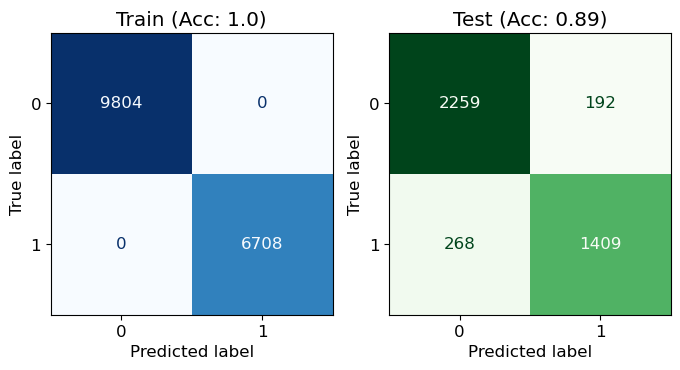

None

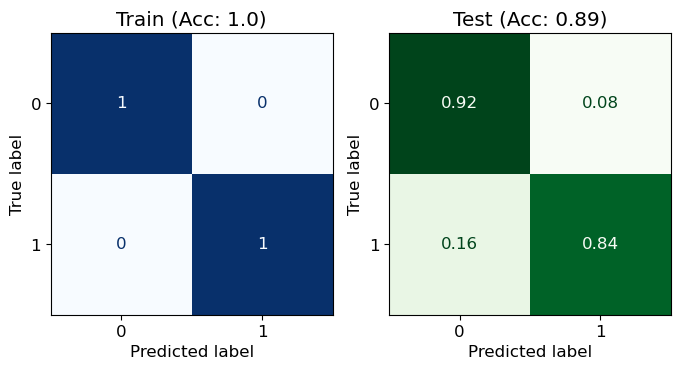

None

In [63]:
# Confusion matrix
display(plot_confusion_matrix(y_train, pred_train, y_test, pred_test, labels=rfcls_gs.classes_))
display(plot_confusion_matrix(y_train, pred_train, y_test, pred_test, labels=rfcls_gs.classes_, normalize='true'))


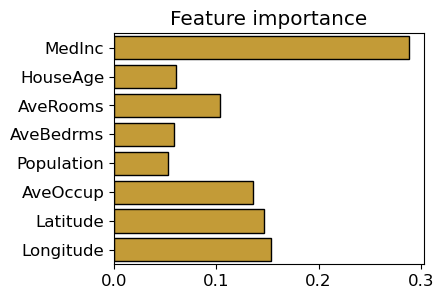

In [127]:
# Feature importance
plt.figure(figsize=(4,3))
sns.barplot(pd.DataFrame([i for i in zip(X_train.columns, rfcls_gs.best_estimator_.feature_importances_)]), y=0, x=1, orient="h", color="goldenrod", edgecolor="black")
plt.xlabel("")
plt.ylabel("")
plt.title("Feature importance")
plt.show()

### For regression:

**Train a decision tree regressor on the data with prices as the targets. As the classifier case, try to examine how the depth of your trees affect your results. Again, all 13 dimensional features are used as input, and the prices as the labels/targets.**

In [144]:
# Data
X_train, y_train, X_test, y_test = load_data(mode = "Regression")

In [94]:
## Grid Search: Random forest

# Model
rfreg = RandomForestRegressor()

# Parameters
params = {
    'n_estimators': [20,50,100,500],
    'max_depth': [10, 30, None],
    'max_samples': [35, None],
    'ccp_alpha': [0.0, 0.5],
}

# Search
rfreg_gs = GridSearchCV(rfreg, params, n_jobs=4, cv=5, verbose=3, scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 4/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=-0.741, test=-0.747) total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=-0.751, test=-0.755) total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=-0.779, test=-0.774) total time=   0.1s[CV 1/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=-0.763, test=-0.769) total time=   0.1s

[CV 5/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=20;, score=(train=-0.771, test=-0.773) total time=   0.1s
[CV 2/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=50;, score=(train=-0.724, test=-0.728) total time=   0.1s
[CV 1/5] END ccp_alpha=0.0, max_depth=10, max_samples=35, n_estimators=50;, score=(train=-0.737, test=-0.742) total time=   0.1s
[CV 3/5] END ccp_alpha=0.0, max_dep

/home/au614901/Software/miniconda3/envs/MLAAU/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END ccp_alpha=0.5, max_depth=10, max_samples=None, n_estimators=500;, score=(train=-1.155, test=-1.148) total time=  57.4s
[CV 2/5] END ccp_alpha=0.5, max_depth=10, max_samples=None, n_estimators=500;, score=(train=-1.155, test=-1.146) total time=  59.0s
[CV 1/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=20;, score=(train=-0.918, test=-0.919) total time=   0.1s
[CV 2/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=20;, score=(train=-0.897, test=-0.891) total time=   0.1s
[CV 3/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=20;, score=(train=-0.968, test=-0.968) total time=   0.1s
[CV 4/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=20;, score=(train=-0.969, test=-0.988) total time=   0.1s
[CV 5/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=20;, score=(train=-0.937, test=-0.930) total time=   0.1s
[CV 1/5] END ccp_alpha=0.5, max_depth=30, max_samples=35, n_estimators=50;, score=(train=-0

In [95]:
# Result
display(rfreg_gs.best_params_)
rfreg_gs.best_score_

{'ccp_alpha': 0.0, 'max_depth': 30, 'max_samples': None, 'n_estimators': 500}

-0.5058012494222031

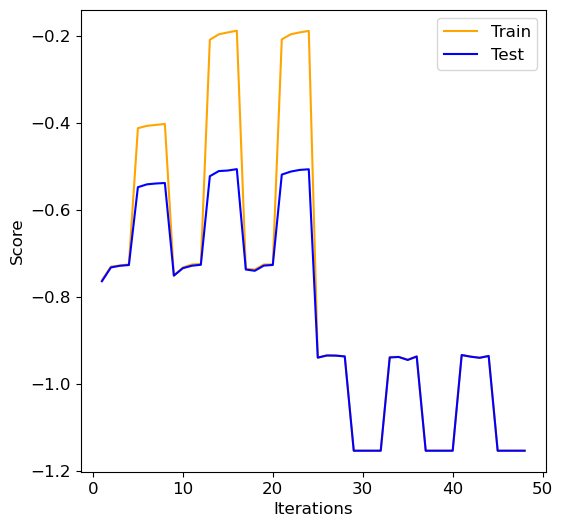

In [101]:
# Train/Test scores
plot_train_test_error(rfreg_gs)

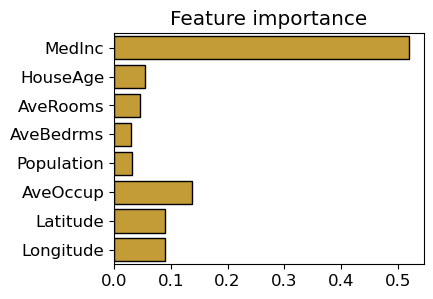

In [128]:
# Feature importance
plt.figure(figsize=(4,3))
sns.barplot(pd.DataFrame([i for i in zip(X_train.columns, rfreg_gs.best_estimator_.feature_importances_)]), y=0, x=1, orient="h", color="goldenrod", edgecolor="black")
plt.xlabel("")
plt.ylabel("")
plt.title("Feature importance")
plt.show()

In [129]:
# Predict
pred_train = rfreg_gs.best_estimator_.predict(X_train)
pred_test = rfreg_gs.best_estimator_.predict(X_test)

In [147]:
# Measure score in test
print(f"Mean squared error: {mean_squared_error(y_test, pred_test)}")

Mean squared error: 2.309608723397599


In [141]:
# Transform prediction to class
mean = pd.concat([y_train, y_test]).mean()
pred_train_cat = [1 if i > mean else 0 for i in pred_train]
pred_test_cat = [1 if i > mean else 0 for i in pred_test]

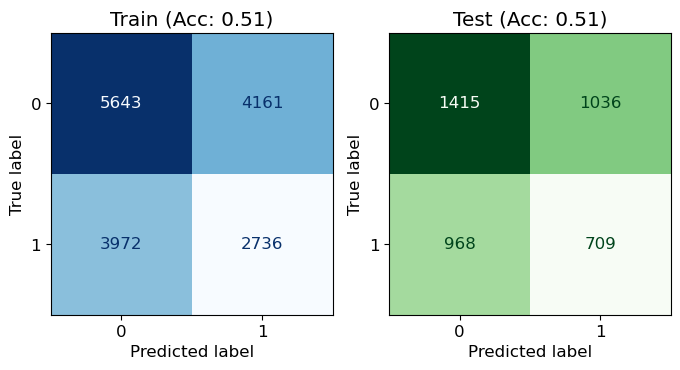

None

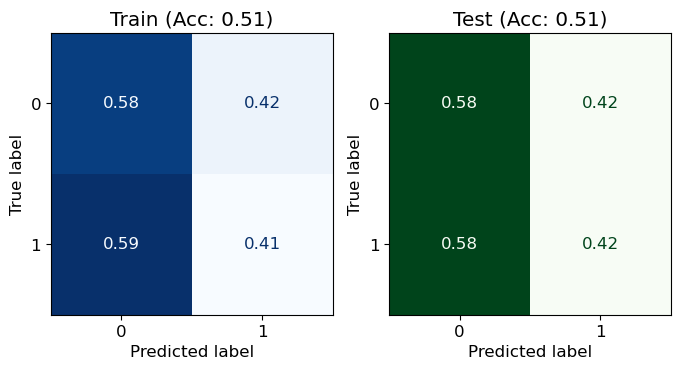

None

In [143]:
# Confusion matrix
X_train, y_train, X_test, y_test = load_data(mode="Classification")
display(plot_confusion_matrix(y_train, pred_train_cat, y_test, pred_test_cat, labels=rfcls_gs.classes_))
display(plot_confusion_matrix(y_train, pred_train_cat, y_test, pred_test_cat, labels=rfcls_gs.classes_, normalize='true'))